In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [288]:
master=pd.read_excel('master_dup_removed.xlsx')
master.head()

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,474.1,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,534.4,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,624.5,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,488.8,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,683.6,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29


In [15]:
master.shape

(1362, 136)

# Notes about the data
1- Sex column has F-M and female-male

2- Age doesn't look normally distributed --> Scaling

3- Is education level proportional to general population? Does it matter?

4- NEO-E Skewed norm dist

5- Only NeoC has a null value (1)


In [16]:
master['lh_bankssts_thickness'].isnull().sum()

0

<AxesSubplot:xlabel='NEO_N', ylabel='Count'>

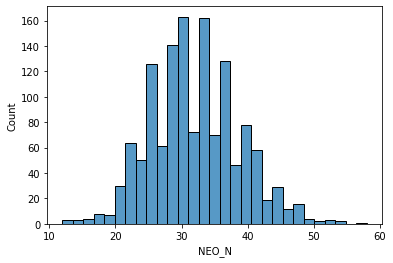

In [17]:
sns.histplot(master['NEO_N'])

In [18]:
master.describe()

,age,BMI,NEO_N,NEO_E,NEO_O,NEO_A,NEO_C,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,...,CC_Mid_Anterior,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles
count,1353.000000,1353.000000,1362.000000,1362.000000,1362.000000,1362.000000,1361.000000,1362.000000,1362.000000,1362.000000,...,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,22.611604,23.452328,32.044053,42.367841,41.140969,41.480910,39.625276,2.612562,2.834280,2.668168,...,624.399192,963.657562,505229.693427,473428.713726,60587.881791,682682.797686,0.982964,21.950808,21.265786,43.216593
std,1.768582,4.461636,6.673963,5.752341,6.254869,5.790108,6.724346,0.150417,0.215096,0.148599,...,154.322225,158.217013,50983.978778,56343.418310,5150.041764,63571.059593,0.113214,12.559680,11.654838,23.134134
min,18.250000,0.000000,12.000000,19.000000,22.000000,25.000000,19.000000,2.112000,2.226000,2.214000,...,319.900000,401.700000,365486.667586,342083.173660,46019.000000,504960.667586,0.839635,0.000000,0.000000,3.000000
25%,21.250000,21.000000,27.000000,38.000000,37.000000,37.250000,35.000000,2.509000,2.685250,2.565000,...,508.750000,853.950000,469216.989462,432865.675953,56841.250000,636360.663303,0.900092,13.000000,12.000000,26.000000
50%,22.500000,23.000000,32.000000,43.000000,41.000000,42.000000,39.000000,2.611000,2.823000,2.671000,...,600.150000,951.350000,502938.890146,468810.834881,60534.500000,679474.039146,0.930576,20.000000,20.000000,41.500000
75%,24.000000,25.000000,36.000000,47.000000,46.000000,46.000000,44.000000,2.709000,2.968750,2.770750,...,717.075000,1057.650000,538850.629653,509955.141002,64040.250000,727203.990361,1.053637,29.000000,28.000000,56.000000
max,26.250000,47.000000,58.000000,58.000000,58.000000,58.000000,59.000000,3.164000,3.663000,3.169000,...,1482.400000,1614.400000,687593.232218,666177.675324,79412.000000,900769.417400,1.430946,120.000000,106.000000,226.000000


<AxesSubplot:xlabel='NEO_C', ylabel='Count'>

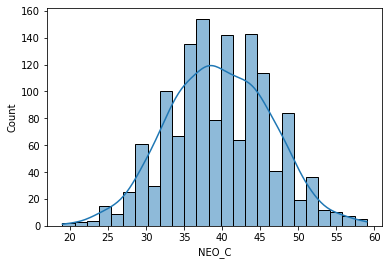

In [43]:
sns.histplot(master['NEO_C'],kde='True')

In [54]:
master['NEO_C'].mean()


39.62527553269655

In [341]:
master

,age,sex,BMI,handedness,education_category,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,26.25,female,24.0,right,applied,2.439,2.985,2.422,1.860,3.808,...,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,3,3
1,21.00,female,23.0,right,academic,2.820,2.684,2.642,2.008,3.573,...,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1,1
2,23.00,male,22.0,right,academic,2.365,2.832,2.538,1.864,3.479,...,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,4,1
3,23.50,female,22.0,right,applied,2.475,2.861,2.488,2.082,2.997,...,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1,3
4,21.75,male,19.0,ambidextrous,applied,2.691,2.566,2.742,2.067,3.222,...,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,male,21.0,right,medium,2.799,2.628,2.885,1.807,3.288,...,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0,4
1358,25.25,male,30.0,right,medium,2.603,2.538,2.538,1.882,3.729,...,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,4,1
1359,20.75,male,22.0,right,high,2.794,3.122,2.885,1.832,3.937,...,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1,3
1360,24.25,female,35.0,right,medium,2.442,2.708,2.645,1.744,3.163,...,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,0,2


In [342]:
from scipy import stats

In [353]:
columns=master.drop(['sex','handedness','education_category'],axis=1).columns.to_list()


In [350]:
normal_test=[stats.normaltest(master[x]) for x in columns]

In [351]:
normal_test

[NormaltestResult(statistic=nan, pvalue=nan),
 NormaltestResult(statistic=nan, pvalue=nan),
 NormaltestResult(statistic=5.463768051946653, pvalue=0.06509653050946425),
 NormaltestResult(statistic=37.62835325158849, pvalue=6.7469409606812105e-09),
 NormaltestResult(statistic=1.2566106496575733, pvalue=0.533495136322228),
 NormaltestResult(statistic=27.44206374086473, pvalue=1.0990857386536413e-06),
 NormaltestResult(statistic=3.6644325395137254, pvalue=0.16005844170926262),
 NormaltestResult(statistic=4.2383866362555205, pvalue=0.12012849491520543),
 NormaltestResult(statistic=0.8424108026778927, pvalue=0.6562552918489766),
 NormaltestResult(statistic=1.2184194437013456, pvalue=0.5437804371105068),
 NormaltestResult(statistic=46.79209916477645, pvalue=6.905971282000655e-11),
 NormaltestResult(statistic=19.84364110722255, pvalue=4.9091701306414696e-05),
 NormaltestResult(statistic=9.577191638898954, pvalue=0.008324137771674714),
 NormaltestResult(statistic=11.215932472429861, pvalue=0.00

# Finding clusters

In [4]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA


In [291]:
clusters = KMeans(n_clusters=5)

In [292]:
y=master[['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O']]
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35,48.0,39,44,37
1,27,34.0,48,53,40
2,35,38.0,37,40,43
3,29,41.0,48,47,41
4,26,45.0,38,35,40
...,...,...,...,...,...
1357,40,32.0,38,39,47
1358,28,40.0,34,41,48
1359,27,45.0,41,44,46
1360,35,41.0,45,32,44


In [293]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
y=pd.DataFrame(imputer.fit_transform(y),columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,35.0,48.0,39.0,44.0,37.0
1,27.0,34.0,48.0,53.0,40.0
2,35.0,38.0,37.0,40.0,43.0
3,29.0,41.0,48.0,47.0,41.0
4,26.0,45.0,38.0,35.0,40.0
...,...,...,...,...,...
1357,40.0,32.0,38.0,39.0,47.0
1358,28.0,40.0,34.0,41.0,48.0
1359,27.0,45.0,41.0,44.0,46.0
1360,35.0,41.0,45.0,32.0,44.0


In [294]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(y)


StandardScaler()

In [295]:
y = pd.DataFrame(scaler.transform(y), columns=y.columns)
y

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,0.443070,1.246413,-0.428631,0.283842,-0.662282
1,-0.756058,-0.837097,1.126315,1.848997,-0.182480
2,0.443070,-0.241809,-0.774175,-0.411782,0.297323
3,-0.456276,0.204658,1.126315,0.805561,-0.022546
4,-0.905949,0.799947,-0.601403,-1.281313,-0.182480
...,...,...,...,...,...
1357,1.192525,-1.134742,-0.601403,-0.585688,0.937059
1358,-0.606167,0.055836,-1.292490,-0.237876,1.096993
1359,-0.756058,0.799947,-0.083088,0.283842,0.777125
1360,0.443070,0.204658,0.607999,-1.803031,0.457257


## K Means Cluster

In [296]:
clusters.fit(y)

KMeans(n_clusters=5)

In [297]:
clusters.fit_transform(y)

array([[2.71770144, 2.09836359, 1.93609846, 1.61333854, 2.32506541],
       [3.19401294, 2.2329502 , 3.4363327 , 2.33772541, 2.92920112],
       [1.61290089, 2.21395109, 1.32263634, 2.45243284, 1.0337939 ],
       ...,
       [2.60910488, 0.70467182, 2.41070254, 1.79474924, 2.1072414 ],
       [1.61344933, 2.79675738, 1.78169888, 2.86688807, 2.97051993],
       [2.0790904 , 1.50582006, 1.84936733, 1.47230143, 1.52065337]])

In [298]:
centers=pd.DataFrame(scaler.inverse_transform(clusters.cluster_centers_),columns=y.columns)
centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,39.226496,35.188034,45.025641,38.910256,44.611111
1,28.042403,44.183746,43.978799,46.522968,45.975265
2,33.094077,38.512195,39.665505,36.609756,36.435540
3,27.267148,44.425993,44.516245,44.530686,35.472924
4,33.729537,35.131673,34.875445,44.811388,43.775801


In [299]:
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [300]:
clusters.labels_

array([3, 1, 4, ..., 1, 0, 3], dtype=int32)

In [301]:
target_label=clusters.labels_

In [302]:
master['target']=target_label
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CC_Anterior,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,954.7,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,1007.6,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,875.2,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,4
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,952.1,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,941.4,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,887.2,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,853.7,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,4
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,1128.7,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,1005.8,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,0


In [303]:
master.target.value_counts()

2    287
1    283
4    281
3    277
0    234
Name: target, dtype: int64

## Gaussian Clusters

In [304]:
from sklearn.mixture import GaussianMixture
gaussian_clusters=gm = GaussianMixture(n_components=5, random_state=0)

In [305]:
gaussian_clusters.fit(y)

GaussianMixture(n_components=5, random_state=0)

In [306]:
gaussian_clusters.means_

array([[ 0.36939452,  0.03377824,  0.70017181, -0.1186042 ,  0.47495203],
       [-0.0879497 , -0.42000532, -0.61562154,  0.46988289,  0.27763802],
       [-0.10964357,  0.12263497, -0.14701913, -0.57167953, -0.61590809],
       [-0.798865  ,  0.83230298,  0.53962362,  0.71891071, -0.06264678],
       [ 1.02353298, -0.71047431, -0.27873605, -0.74534831,  0.09162942]])

In [307]:
gaussian_centers=pd.DataFrame(scaler.inverse_transform(gaussian_clusters.means_),columns=y.columns)
gaussian_centers

,NEO_N,NEO_C,NEO_A,NEO_E,NEO_O
0,34.508473,39.851787,45.533492,41.685840,44.110641
1,31.457295,36.802621,37.917704,45.069776,42.876921
2,31.312564,40.448853,40.629966,39.080553,37.289959
3,26.714415,45.217417,44.604242,46.501743,40.749266
4,38.872565,34.850835,39.867591,38.081918,41.713889


In [308]:
gaussian_target=gaussian_clusters.predict(y)

In [309]:
master['gaussian_target']=gaussian_target
master

,participant_id,age,sex,BMI,handedness,education_category,NEO_N,NEO_E,NEO_O,NEO_A,...,CortexVol,CerebralWhiteMatterVol,SubCortGrayVol,TotalGrayVol,MaskVol-to-eTIV,lhSurfaceHoles,rhSurfaceHoles,SurfaceHoles,target,gaussian_target
0,sub-0001,26.25,F,24.0,right,applied,35,44,37,39,...,431722.308490,412508.155809,52096,579143.308490,1.104817,12,15,27,3,3
1,sub-0002,21.00,F,23.0,right,academic,27,53,40,48,...,551229.524399,511140.955357,61775,729961.524399,0.946018,12,3,15,1,1
2,sub-0003,23.00,M,22.0,right,academic,35,40,43,37,...,484203.743223,488806.827011,55089,666343.743223,1.121519,7,8,15,4,1
3,sub-0004,23.50,F,22.0,right,applied,29,47,41,48,...,490562.774910,424675.040008,57767,666421.774910,1.046196,14,9,23,1,3
4,sub-0005,21.75,M,19.0,ambidextrous,applied,26,35,40,38,...,549885.250985,473013.916100,60987,723713.250985,0.981137,17,12,29,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,sub-1358,22.25,male,21.0,right,medium,40,39,47,38,...,517851.745617,517310.502374,66447,711842.745617,0.921517,19,23,42,0,4
1358,sub-1359,25.25,male,30.0,right,medium,28,41,48,34,...,519398.357112,565436.699430,65260,718521.357112,0.933091,20,34,54,4,1
1359,sub-1360,20.75,male,22.0,right,high,27,44,46,41,...,567440.125601,469283.579026,61988,756582.125601,0.881901,20,33,53,1,3
1360,sub-1361,24.25,female,35.0,right,medium,35,32,44,45,...,441752.267831,442438.198680,55159,595460.267831,1.003723,31,34,65,0,2


# First model

In [24]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
M

In [310]:
master=master.drop(['NEO_N','NEO_C','NEO_A','NEO_E','NEO_O','participant_id'],axis=1)

In [311]:
master['sex'].replace('F','female',inplace=True)
master['sex'].replace('M','male',inplace=True)


In [313]:
X=master.drop(['target','gaussian_target'],axis=1)


In [314]:
y_kmeans=master['target']
y_gauss=master['gaussian_target']

## Testing with kmeans target

In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_kmeans, test_size=0.3, random_state=42)

In [315]:
from sklearn.preprocessing import OrdinalEncoder
categorical_preprocessor = OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)


In [316]:
X_train.dtypes.value_counts()


float64    119
int64       13
object       3
dtype: int64

In [317]:
simple_imp=SimpleImputer(strategy='most_frequent')
simple_imp.fit_transform(X_train)

array([[21.0, 'female', 21.0, ..., 30, 23, 53],
       [22.0, 'male', 22.0, ..., 6, 9, 15],
       [23.75, 'male', 34.0, ..., 32, 32, 64],
       ...,
       [25.5, 'male', 25.0, ..., 15, 14, 29],
       [20.5, 'male', 25.0, ..., 24, 21, 45],
       [20.25, 'female', 41.0, ..., 29, 22, 51]], dtype=object)

## Creating pipeline

In [318]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import TransformerMixin, BaseEstimator

num_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='median')),
    ('r_scaler', StandardScaler())
])


## CATEGORICAL TRANSFORMER - ONE HOT ENCODER
cat_transformer = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ord_encoder', OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1))
])

## BUILDING THE PREPROCESSOR
preprocessor = ColumnTransformer([
        ('num_transformer', num_transformer, make_column_selector(dtype_include=['int64','float64'])),
        ('cat_transformer', cat_transformer, make_column_selector(dtype_include=['object']))],
remainder='passthrough')




## Pipeline and Fitting

In [319]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
hist_gbs = HistGradientBoostingClassifier(loss='categorical_crossentropy')
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    #('dense', FunctionTransformer(lambda x: x.todense(), accept_sparse=True)),
    ('hist_gbs', hist_gbs)
])

In [323]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [30,50,100],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [325]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('r_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x126db6250>),
                                                                        ('cat_transformer',
                                                        

In [326]:
grid_search.cv_results_

{'mean_fit_time': array([ 6.71331978,  7.82500353,  9.07701483,  9.43377995, 13.93543692,
        13.38756776, 16.18436646, 18.38176923, 43.25702863, 35.83776994,
        27.64092455, 28.10076857]),
 'std_fit_time': array([0.16456087, 0.13230674, 0.81820728, 0.31405358, 1.34419548,
        0.35552719, 1.54608089, 0.60767688, 1.88638292, 7.21325482,
        0.43824763, 0.71381088]),
 'mean_score_time': array([0.06303782, 0.06151819, 0.07111692, 0.07475767, 0.09839039,
        0.09584055, 0.10611711, 0.08541341, 0.27160726, 0.11708899,
        0.11944108, 0.09673123]),
 'std_score_time': array([0.00967413, 0.01214707, 0.02052815, 0.01941932, 0.03027443,
        0.04516079, 0.04073249, 0.01182768, 0.11200934, 0.02079264,
        0.02267167, 0.04369638]),
 'param_hist_gbs__max_iter': masked_array(data=[30, 30, 30, 30, 50, 50, 50, 50, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill

In [327]:
predictions=grid_search.predict(X_test)

In [328]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.27383863080684595

In [329]:
grid_search.best_params_

{'hist_gbs__max_iter': 50, 'hist_gbs__max_leaf_nodes': 40}

# Testing with Gaussian Clusters

In [330]:
from sklearn.model_selection import train_test_split
X_train_gauss, X_test_gauss, y_train_gauss, y_test_gauss = train_test_split(X, y_gauss, test_size=0.3, random_state=42)

In [331]:
grid_search_gauss = GridSearchCV(
    pipeline,
    param_grid={
        'hist_gbs__max_iter': [30,50,100],
        'hist_gbs__max_leaf_nodes':[15,20,30,40]
    },
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

In [332]:
grid_search_gauss.fit(X_train_gauss,y_train_gauss)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('simple_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('r_scaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x126db6250>),
                                                                        ('cat_transformer',
                                                        

In [333]:
grid_search_gauss.cv_results_

{'mean_fit_time': array([ 5.73380523,  7.66220803,  9.52529492,  8.10167084,  9.98634648,
        11.64271493, 13.42407098, 13.00443568, 18.19017792, 22.17645526,
        31.17158723, 36.86901941]),
 'std_fit_time': array([0.14662464, 0.78850039, 0.41755327, 0.61259167, 0.1798592 ,
        0.25357294, 0.80088278, 0.38229583, 0.62939671, 1.25361764,
        1.9436723 , 2.53199924]),
 'mean_score_time': array([0.05606666, 0.05616994, 0.07776451, 0.06477084, 0.08306756,
        0.07919483, 0.07174783, 0.07360411, 0.12286592, 0.11941051,
        0.19842634, 0.25221891]),
 'std_score_time': array([0.00940963, 0.0104514 , 0.01061271, 0.01812674, 0.02081326,
        0.00725442, 0.01118469, 0.01296248, 0.00441711, 0.00628413,
        0.13459633, 0.31248881]),
 'param_hist_gbs__max_iter': masked_array(data=[30, 30, 30, 30, 50, 50, 50, 50, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill

In [334]:
gauss_pred=grid_search_gauss.predict(X_test_gauss)

In [335]:
gauss_score=accuracy_score(y_test_gauss,gauss_pred)
gauss_score

0.31784841075794623

# Cross Validation

In [259]:
from sklearn.model_selection import cross_validate

In [271]:
simple_imputer=SimpleImputer()

In [336]:
X_clean=pd.get_dummies(X)
X_clean

,age,BMI,lh_bankssts_thickness,lh_caudalanteriorcingulate_thickness,lh_caudalmiddlefrontal_thickness,lh_cuneus_thickness,lh_entorhinal_thickness,lh_fusiform_thickness,lh_inferiorparietal_thickness,lh_inferiortemporal_thickness,...,sex_female,sex_male,handedness_ambidextrous,handedness_left,handedness_right,education_category_academic,education_category_applied,education_category_high,education_category_low,education_category_medium
0,26.25,24.0,2.439,2.985,2.422,1.860,3.808,2.592,2.348,2.531,...,1,0,0,0,1,0,1,0,0,0
1,21.00,23.0,2.820,2.684,2.642,2.008,3.573,2.838,2.564,2.706,...,1,0,0,0,1,1,0,0,0,0
2,23.00,22.0,2.365,2.832,2.538,1.864,3.479,2.658,2.399,2.804,...,0,1,0,0,1,1,0,0,0,0
3,23.50,22.0,2.475,2.861,2.488,2.082,2.997,2.755,2.538,2.647,...,1,0,0,0,1,0,1,0,0,0
4,21.75,19.0,2.691,2.566,2.742,2.067,3.222,2.795,2.774,2.616,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,22.25,21.0,2.799,2.628,2.885,1.807,3.288,2.887,2.646,2.941,...,0,1,0,0,1,0,0,0,0,1
1358,25.25,30.0,2.603,2.538,2.538,1.882,3.729,2.760,2.388,2.724,...,0,1,0,0,1,0,0,0,0,1
1359,20.75,22.0,2.794,3.122,2.885,1.832,3.937,2.814,2.707,2.864,...,0,1,0,0,1,0,0,1,0,0
1360,24.25,35.0,2.442,2.708,2.645,1.744,3.163,2.573,2.480,2.875,...,1,0,0,0,1,0,0,0,0,1


In [339]:
cv=cross_validate(pipeline,X,y_gauss,cv=5,n_jobs=-1,scoring='accuracy')

In [340]:
cv['test_score'].mean()

0.2980876966171084

/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not impo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns


/Users/paula/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [10]:
graph={'TotalGrayVol':0.325997,'BrainSegVolNotVent':0.293673,'CerebralWhiteMatterVol':0.288446,
       'lh_MeanThickness_thickness':0.248556,'CortexVol':0.178267,'rh_MeanThickness_thickness':0.15392,
      'MaskVol-to-eTIV':0.115268,'eTIV':0.103164,'SubCortGrayVol':0.056809,'Left-Thalamus-Proper':0.05206,
      'Right-Putamen':0.039615,'lh_superiortemporal_thickness':0.038377,'Left-Cerebellum-White-Matter':0.034113,
      'Left-Putamen':0.033975}

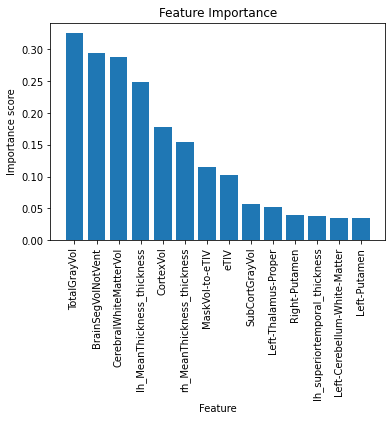

In [13]:
plt.bar(graph.keys(),graph.values())
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance score')
plt.show()